<a href="https://colab.research.google.com/github/dieund/Tiny-YoloV4/blob/main/YOLOv4_tiny_Darknet_BienBaoGiaoThong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Nhóm 1 môn Tìm kiếm thông tin thị giác
**Đề tài biển báo giao thông trên TinyYoloV4**
Thành viên:
- Nguyễn Duy Diệu
- Nguyễn Xuân Huy


In [41]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version
#take a look at the kind of GPU we have
!nvidia-smi

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
Mon Jan 24 09:49:13 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8    32W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |            

# Update Darknet cho YOLOv4 lên Colab từ Drive cá nhân




In [3]:
%cd /content/
%rm -rf darknet

/content


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!cp /content/drive/MyDrive/TinyYoloV4/tiny-yolov4.zip /content/
!unzip tiny-yolov4.zip>/dev/null

warning [tiny-yolov4.zip]:  76 extra bytes at beginning or within zipfile
  (attempting to process anyway)
error [tiny-yolov4.zip]:  reported length of central directory is
  -76 bytes too long (Atari STZip zipfile?  J.H.Holm ZIPSPLIT 1.1
  zipfile?).  Compensating...
error:  expected central file header signature not found (file #80505).
  (please check that you have transferred or created the zipfile in the
  appropriate BINARY mode and that you have compiled UnZip properly)


#Make darknet

In [ ]:
%cd /content/darknet
!make

## Hiển thị Hình ảnh
Hiển thị hình ảnh trên Colab

In [7]:
#define utility function
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

## Dịnh dạng lại tên của các loại nhan
Hiện tại đang để từ 0 đến 42 loại

In [16]:
labels_path = '/content/trafficsign_dataset/obj.names'
#make a list of your labels
labels = ['Max 20','Max 30','Max 50','Max 60','Max 70','Max 80','End max 80','Max 100','Max 120','Cam xe con vuot trai','Cam xe tai vuot trai','Giao nhau voi duong khong uu tien','Giao nhau voi duong uu tien','Nguy hiemn','Dung lai','Cam cac loai phuong tien','Cam xe Tai','Cam di nguoc chieu','Nguy hiem khac','Nguy hiem  khi re trai','Nguy hiem khi re phai','Nguy hiem duong quanh co', 'Nguy hiem nui','Nguy hiem duong tron','Duong phia truoc hep','Dang sua duong phia truoc','Tin hieu giao thong','Nguoi di bo','Duong co tre em di qua','Duong co xe dap','Duong co tuyet','Duong co thu rung bang qua','Het gioi han toc do','Bat buoc re phai','Bat buoc re trai','Bat buoc di thang','Duoc phep di thang hoac re phai','Duoc phep di thang hoac re trai','Di huong phai','Du huong trai','Di theo vong xuyen','Het cam xe con vuot','Het cam xe tai vuot']

with open(labels_path, 'w') as f:

    f.write('\n'.join(labels))

#check that the labels file is correct
!cat /content/trafficsign_dataset/obj.names

Max 20
Max 30
Max 50
Max 60
Max 70
Max 80
End max 80
Max 100
Max 120
Cam xe con vuot trai
Cam xe tai vuot trai
Giao nhau voi duong khong uu tien
Giao nhau voi duong uu tien
Nguy hiemn
Dung lai
Cam cac loai phuong tien
Cam xe Tai
Cam di nguoc chieu
Nguy hiem khac
Nguy hiem  khi re trai
Nguy hiem khi re phai
Nguy hiem duong quanh co
Nguy hiem nui
Nguy hiem duong tron
Duong phia truoc hep
Dang sua duong phia truoc
Tin hieu giao thong
Nguoi di bo
Duong co tre em di qua
Duong co xe dap
Duong co tuyet
Duong co thu rung bang qua
Het gioi han toc do
Bat buoc re phai
Bat buoc re trai
Bat buoc di thang
Duoc phep di thang hoac re phai
Duoc phep di thang hoac re trai
Di huong phai
Du huong trai
Di theo vong xuyen
Het cam xe con vuot
Het cam xe tai vuot

## Thay đổi số lớp trong obj.data.
Từ dữ liệu labes

In [19]:
import re
objdata = '/content/trafficsign_dataset/obj.data'
with open(objdata) as f:
    s = f.read()

#the number of classes is equal to the number of labels
num_classes = 43   
s = re.sub('classes = \d*','classes = ' + str(num_classes),s)

with open(objdata, 'w') as f:
  f.write(s)
!cat /content/trafficsign_dataset/obj.data

classes= 42
train  = /content/trafficsign_dataset/train.txt
valid  = /content/trafficsign_dataset/valid.txt
names = /content/trafficsign_dataset/obj.names
backup = backup/

### thay đổi các thong osoos trong dataset.

In [10]:
# set the number of max_batches - min 2000 per class:
max_batch=4000
# calculate the 2 steps values:
step1 = 0.8 * max_batch
step2 = 0.9 * max_batch

# we also need to adjust the number of classes and a parameter called filter size 
# that are both is inside the model structure

# num_classes = len(labels)
num_filters = (num_classes + 5) * 3


cfg_file = '/content/trafficsign_dataset/yolov4-tiny.cfg'

with open(cfg_file) as f:
    s = f.read()
# (re.sub('[a-z]*@', 'ABC@', s))
s = re.sub('max_batches = \d*','max_batches = '+str(max_batch),s)
s = re.sub('steps=\d*,\d*','steps='+"{:.0f}".format(step1)+','+"{:.0f}".format(step2),s)
s = re.sub('classes=\d*','classes='+str(num_classes),s)
s = re.sub('pad=1\nfilters=\d*','pad=1\nfilters='+"{:.0f}".format(num_filters),s)
# pad=1\nfilters=\d\d
# s = re.sub('CUDNN=0','CUDNN=1',s)
# s = re.sub('OPENCV=0','OPENCV=1',s)

with open(cfg_file, 'w') as f:
  # s = re.sub('GPU=0','GPU=1',s)
  f.write(s)


## Bắt đầu training model (khoảng 2 tiếng)

In [11]:
%cd ../darknet/
!./darknet detector train /content/trafficsign_dataset/obj.data /content/trafficsign_dataset/yolov4-tiny.cfg /content/trafficsign_dataset/yolov4-tiny.conv.29 -dont_show -ext_output -map

Streaming output truncated to the last 5000 lines.
 total_bbox = 214050, rewritten_bbox = 0.000000 % 

 (next mAP calculation at 4894 iterations) 
 Last accuracy mAP@0.50 = 70.93 %, best = 70.93 % ]2;3385/4000: loss=0.1 map=0.71 best=0.71 hours left=0.2
 3385: 0.087902, 0.122109 avg loss, 0.000261 rate, 1.144670 seconds, 216640 images, 0.228038 hours left
Loaded: 0.000082 seconds
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.878647), count: 64, class_loss = 0.242748, iou_loss = 0.063529, total_loss = 0.306277 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 214114, rewritten_bbox = 0.000000 % 

 (next mAP calculation at 4894 iterations) 
 Last accuracy mAP@0.50 = 70.93 %, best = 70.93 % ]2;3386/4000: loss=0.1 map=0.71 best=0.71 hours left=0.2
 3386: 0.121440, 0.122042 avg loss, 0.000261 rate, 1.162455 seconds, 2167

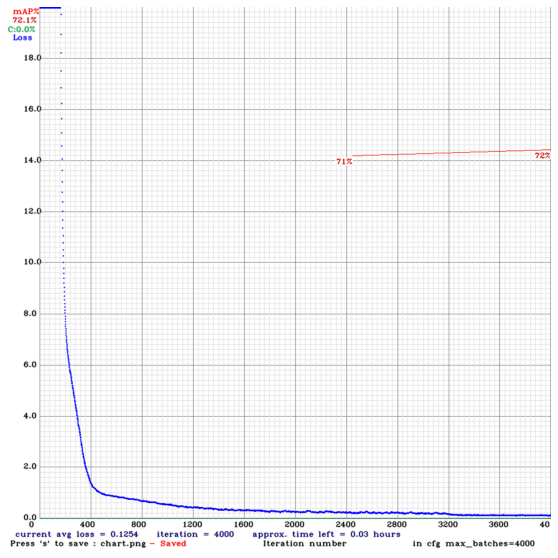

In [12]:
imShow("chart_yolov4-tiny.png")

## Kiểm tra performance của model 
Test thử

In [13]:
!./darknet detector map /content/trafficsign_dataset/obj.data /content/trafficsign_dataset/yolov4-tiny.cfg "/content/darknet/backup/yolov4-tiny_best.weights" -points 0

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	    

## Chạy test từ file test.txt

In [14]:
!cp /content/darknet/backup/yolov4-tiny_best.weights /content/drive/MyDrive/TinyYoloV4/

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	    

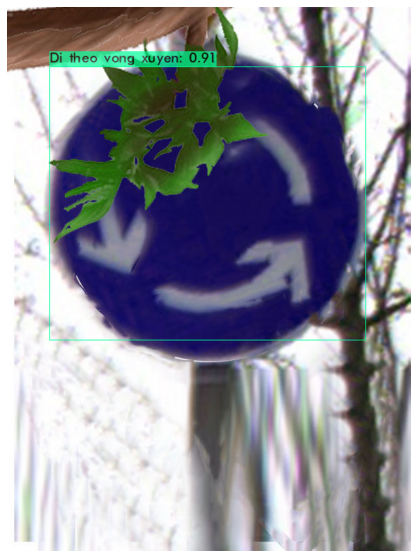

In [40]:
!./darknet detector test /content/trafficsign_dataset/obj.data  /content/trafficsign_dataset/yolov4-tiny.cfg  "/content/darknet/backup/yolov4-tiny_best.weights" "/content/trafficsign_dataset/test/hinh.jpg" -ext_output
imShow('predictions.jpg')